In [1]:
import numpy as np
from sympy.abc import x,y,z
from sympy import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#init_printing()
from misc_tools.print_latex import print_tex

input example : 
>>> arr_T = np.array([[r'\vec{v}_1', r'\vec{v}_2']]).T
>>> print_tex(arr_T,'=', np.arange(1,5).reshape(2,-1)/4, r'; symbols: \otimes, \cdot,\times')
output: 


<IPython.core.display.Math object>

# First order methods
## Gradient Descent

At step $k$ follow direction $\vec{d}_k$ of steepest descent $\vec{g}_k$
$$\vec{g}_i = \nabla f(\vec{x}_i)$$
$$\vec{d}_i  = - \frac{\nabla f(\vec{x}_i)}{||\nabla f(\vec{x}_i)||}= -\frac{\vec{g}_i}{||\vec{g}_i||}$$
to visit next point
$$\vec{x}_{i+1} = \vec{x}_i + \alpha \vec{d}_i$$
we adjust step size $\alpha$ by minimization (finding zero derivative along search direction $\vec{d}_i$)
$$\frac{{\partial f}}{\partial \alpha} = 0 \rightarrow \nabla f(\vec{x}_i + \alpha^* \vec{d}_i)\cdot \vec{d}_i = 0$$

Right part tells the derivative at solution $\alpha^*$ projected onto direction $\vec{d}_i$ should also be zero (minimum)

Notice
$$\vec{d}_{i+1}  = - \frac{\nabla f(\vec{x}_{i+1} )}{||\nabla f(\vec{x}_{i+1} )||}= - \frac{\nabla f(\vec{x}_i + \alpha^* \vec{d}_i)}{||\nabla f(\vec{x}_i + \alpha^* \vec{d}_i)||}$$

$$\underbrace{-||\nabla f(\vec{x}_i + \alpha^* \vec{d}_i)|| \ \vec{d}_{i + 1}}_{\nabla f(\vec{x}_i + \alpha^* \vec{d}_i)}  \cdot \vec{d}_i = \nabla f(\vec{x}_i + \alpha^* \vec{d}_i)\cdot \vec{d}_i = 0$$

Which means sequential displacements are orthogonal
$$ \vec{d}_{i + 1} \cdot \vec{d}_i = 0$$


Naturally, analytic expression for gradients would not be available, unless we have formulated problem in a way where gradients are not explicitly needed (as in [Notes_Steepest_Descent.ipynb](Notes_Steepest_Descent.ipynb))

Otherwise we can show example where gradient is computed analytically, but step size is constant, so $\alpha^*$ is not reached.

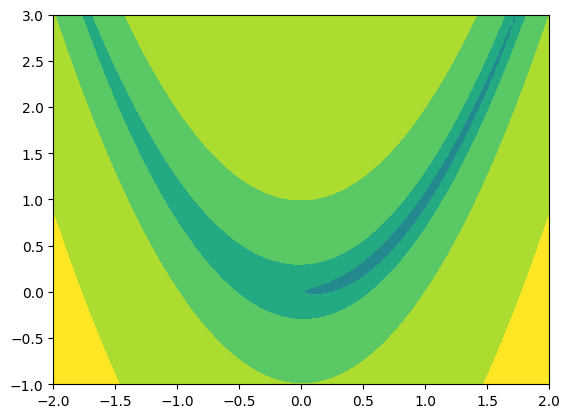

In [2]:
a,b         = 1,100
f           = (a - x)**2 + b*(y-x**2)**2

grad_f      = Matrix([f]).jacobian((x,y))
f_L         = lambdify((x,y), f, 'numpy')
grad_f_L    = lambdify((x,y), grad_f, 'numpy')

sp = 100
X,Y = np.meshgrid(np.linspace(-2,2,sp),np.linspace(-1,3,sp))
Z   = f_L(X,Y)
norm = colors.LogNorm(vmin=Z.min(), vmax=Z.max())
plt.contourf(X,Y,Z, levels = 10, norm=norm);

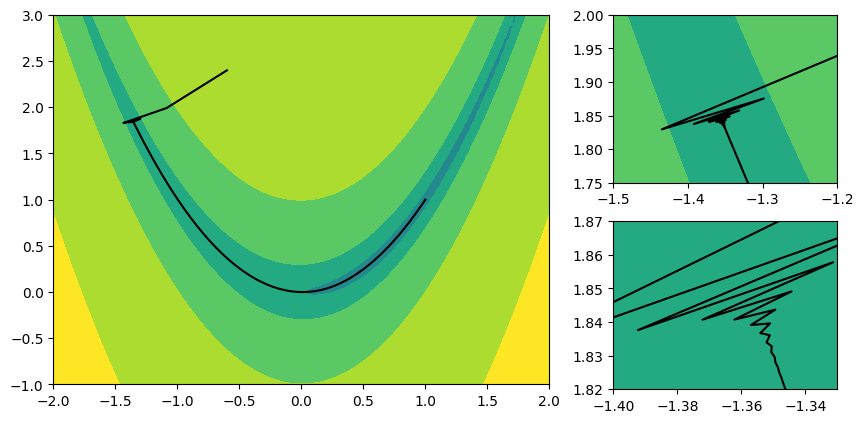

In [3]:
x = np.array([-.6,2.4]) # Starting point
learning_rate = 0.001
num_iterations = 20000
traj = [x.copy()]
for i in range(num_iterations):
    grad = grad_f_L(*x)[0]
    x -= learning_rate * grad
    traj.append(x.copy())


dom1 = ((-2,2),(-1,3))
dom2 = ((-1.5,-1.2),(1.75,2))
dom3 = ((-1.4, -1.33), (1.82, 1.87))

def plot_grad(traj, dom1,dom2,dom3, sp = 100):
    fig, ax1 = plt.subplots()
    X,Y = np.meshgrid(np.linspace(*dom1[0],sp),np.linspace(*dom1[1],sp))
    Z   = f_L(X,Y)
    norm = colors.LogNorm(vmin=Z.min(), vmax=Z.max())
    norm = colors.LogNorm(vmin=Z.min(), vmax=Z.max())
    ax1.contourf(X,Y,Z, levels = 10, norm=norm);
    ax1.plot(*np.array(traj).T, c = 'k')

    left, bottom, width, height = [1, 0.53, 0.35, 0.35]
    ax2 = fig.add_axes([left, bottom, width, height])
    xmin,xmax = dom2[0]
    ymin,ymax = dom2[1]
    X,Y = np.meshgrid(np.linspace(*dom2[0],sp),np.linspace(*dom2[1],sp))
    Z   = f_L(X,Y)
    ax2.contourf(X,Y,Z, levels = 10, norm=norm);
    ax2.plot(*np.array(traj).T, c = 'k')
    ax2.set_xlim(xmin,xmax)
    ax2.set_ylim(ymin,ymax)

    left, bottom, width, height = [1, 0.1, 0.35, 0.35]
    ax3 = fig.add_axes([left, bottom, width, height])
    s = 0.9
    xmin,xmax = dom3[0]
    ymin,ymax = dom3[1]
    X,Y = np.meshgrid(np.linspace(*dom3[0],sp),np.linspace(*dom3[1],sp))
    Z   = f_L(X,Y)
    ax3.contourf(X,Y,Z, levels = 10, norm=norm);
    ax3.plot(*np.array(traj).T, c = 'k')
    ax3.set_xlim(xmin,xmax)
    ax3.set_ylim(ymin,ymax)

plot_grad(traj, dom1,dom2,dom3)

## Conjugate Gradient Descent

For solving $A\vec{x} = \vec{b}$, topic is covered in [Notes_Method_of_Conjugate_Gradient_Descent.ipynb](Notes_Method_of_Conjugate_Gradient_Descent.ipynb), which requires [Notes_Method_of_Conjugate_Directions.ipynb](Notes_Method_of_Conjugate_Directions.ipynb) and steepest descent.

Idea is that step directions are orthogonalized in a way that each iteration one dimension of search is solved.

This requires special A-orthogonalization (or conjugation?), where 
$$\vec{d}^T_i A \vec{d}_j = 0 \ ; \ i \neq j $$


## Momentum


What can i say? Momentum is accumulated on flat planes.
$$\vec{v}_{i+1} = \beta \vec{v}_i - \alpha \vec{g}_i$$
$$\vec{x}_{i+1} = \vec{x}_i + \vec{v}_{i+1}$$

num iters: 5026


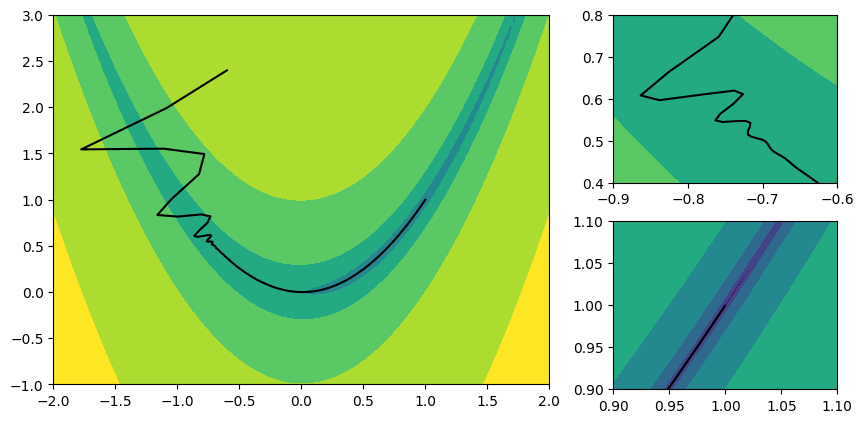

In [4]:
x = np.array([-.6,2.4]) # Starting point
v = np.zeros_like(x)
beta = 0.7
learning_rate = 0.001
num_iterations = 20000
traj = [x.copy()]
for i in range(num_iterations):
    grad = grad_f_L(*x)[0]
    v = beta*v - learning_rate * grad
    x  = x + v
    traj.append(x.copy())
    if np.linalg.norm(x-1) < 0.001: 
        print(f'num iters: {i}')
        break

dom2 = ((-0.9, -.6),(.4,.8))
dom3 = ((1-0.1, 1+0.1), (1-0.1, 1+0.1))
plot_grad(traj, dom1,dom2,dom3)



### Nesterov momentum
Calculate gradient at expected position (driven by momentum)
$$\vec{v}_{i+1} = \beta \vec{v}_i - \alpha \nabla f(\vec{x}_i+ \beta \vec{v}_i)$$
Anticipation of a next gradient 'prevents' overshooting target.

num iters: 5176


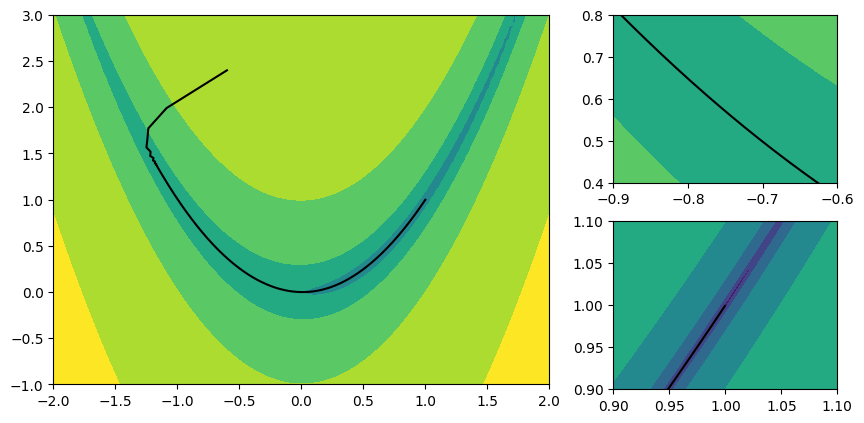

In [5]:
x = np.array([-.6,2.4]) # Starting point
v = np.zeros_like(x)
beta = 0.7
learning_rate = 0.001
num_iterations = 20000
traj = [x.copy()]
for i in range(num_iterations):
    grad = grad_f_L(*(x+beta*v))[0]
    
    v = beta*v - learning_rate * grad
    x  = x + v
    traj.append(x.copy())
    if np.linalg.norm(x-1) < 0.001: 
        print(f'num iters: {i}')
        break

dom2 = ((-0.9, -.6),(.4,.8))
dom3 = ((1-0.1, 1+0.1), (1-0.1, 1+0.1))
plot_grad(traj, dom1,dom2,dom3)

## Adagrad
Adaptive subgradient method tries to lower gradient entries based on values in previous history.

This means we have to accumulate last entires and 'normalize' new gradient by this sum.
for $k$-th entry of $\vec{x}_{i+1}$
$$(\vec{x}_{i+1})_k = (\vec{x}_{i})_k  - \frac{\alpha}{\epsilon + \sqrt{s_{i,k}}} (\vec{g}_{i})_k$$
where $s_{i,k}$ is sum of squares of gradients $i$-th component for last $k$ steps
$$s_{i,k} = (\vec{g}_{1})_i^2+ (\vec{g}_{2})_i^2 +  \dots  = \sum_{j = 1}^k  (\vec{g}_{j})_i^2$$

Since $s_{i,k}$ is non-negative value, its unavoidable that at after many iterations grad 'normalization' will dampen all components and progress will halt.

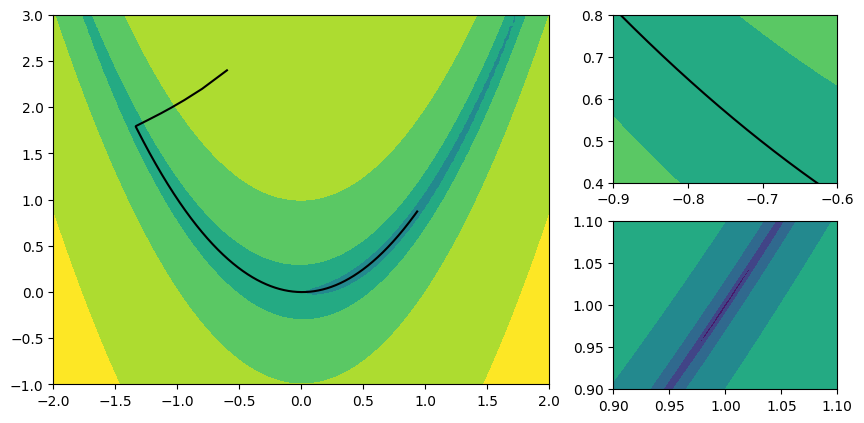

In [6]:
x               = np.array([-.6,2.4]) # Starting point
g2_hist       = np.zeros_like(x)
learning_rate   = 0.2
num_iterations  = 20000
eps             = 1e-8
traj            = [x.copy()]
for i in range(num_iterations):
    grad = grad_f_L(*x)[0]
    g2_hist += grad**2
    x  = x - learning_rate /(eps + np.sqrt(g2_hist))* grad
    traj.append(x.copy())
    if np.linalg.norm(x-1) < 0.001: 
        print(f'num iters: {i}')
        break

dom2 = ((-0.9, -.6),(.4,.8))
dom3 = ((1-0.1, 1+0.1), (1-0.1, 1+0.1))
plot_grad(traj, dom1,dom2,dom3)


## RMSProp
Avoids problems of adagrad by applying only a fraction of cumulative gradient
$$\vec{s}_{i+1} = \gamma \vec{s}_i + (1- \gamma) (\vec{g}_i \odot \vec{g}_i)$$
RMS in the name is motivated by "Root Mean Square". Root and square aspects are obvious. What involves mean.. idk.

num iters: 9315


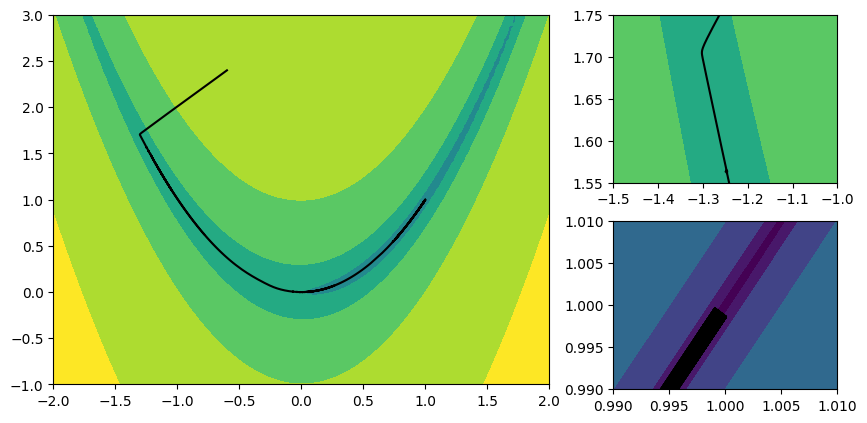

In [7]:
x               = np.array([-.6,2.4]) # Starting point
g2_hist       = np.zeros_like(x)
gamma           = 0.95
learning_rate   = 0.001
num_iterations  = 20000
eps             = 1e-6
traj            = [x.copy()]
for i in range(num_iterations):
    grad = grad_f_L(*x)[0]
    g2_hist  = gamma* g2_hist + (1-gamma)*grad*grad
    x  = x - learning_rate /(eps + np.sqrt(g2_hist))* grad
    traj.append(x.copy())
    if np.linalg.norm(x-1) < 0.001: 
        print(f'num iters: {i}')
        break

dom2 = ((-1.5, -1),(1.55,1.75))
dom3 = ((1-0.01, 1+0.01), (1-0.01, 1+0.01))
plot_grad(traj, dom1,dom2,dom3)


## Adadelta

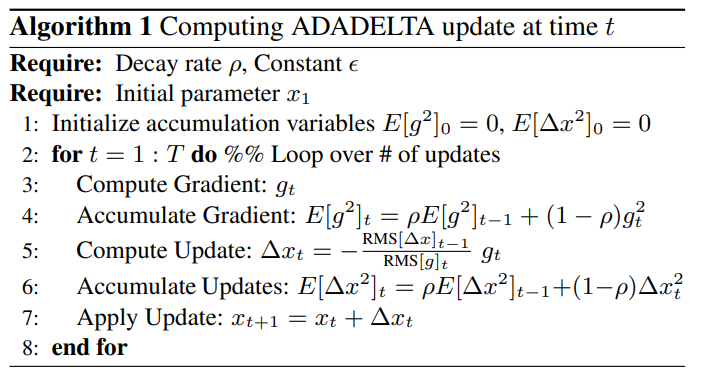

Dont know why it does not run. double checked it. tripple checked!

C:\Users\Hot Mexican\AppData\Local\Temp\ipykernel_11704\2501214175.py:42: UserWarning: Log scale: values of z <= 0 have been masked
  ax3.contourf(X,Y,Z, levels = 10, norm=norm);


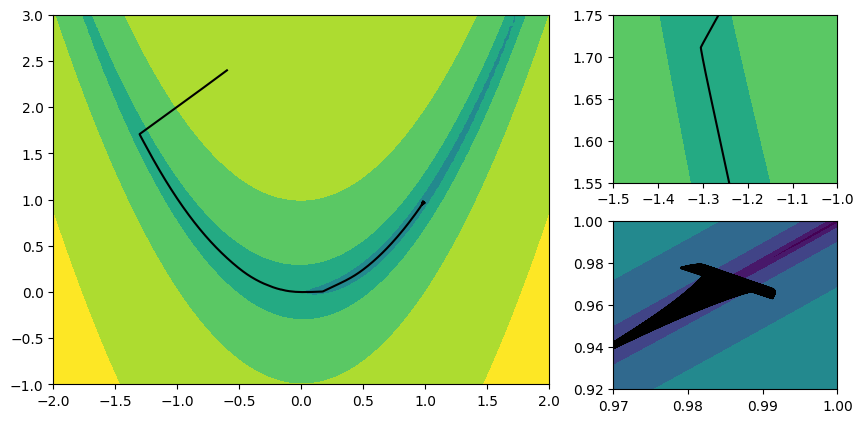

In [8]:
x               = np.array([-.6,2.4]) # Starting point
dx              = np.zeros_like(x)
g2_hist         = np.zeros_like(x)
u2_hist         = np.zeros_like(x)
rho             = 0.09
#gamma_u         = 0.09
num_iterations  = 20000
eps             = 1e-6
traj            = [x.copy()]

for i in range(num_iterations):
    grad        = grad_f_L(*x)[0]
    g2_hist     = rho* g2_hist + (1-rho)*grad**2
    dx          = -(np.sqrt(u2_hist) + eps)/(np.sqrt(g2_hist) + eps) * grad
    u2_hist     = rho * u2_hist + (1-rho) * dx**2
    x           += dx
    traj.append(x.copy())
    if np.linalg.norm(x-1) < 0.001: 
        print(f'num iters: {i}')
        break

dom2 = ((-1.5, -1),(1.55,1.75))
dom3 = ((1-0.03, 1), (1-0.08, 1))
plot_grad(traj, dom1,dom2,dom3)


## Adam

## Hypergradient Descent